In [1]:
%matplotlib inline
from collections import namedtuple
import numpy as np
import sklearn
from matplotlib import cm # colormaps
import matplotlib.pyplot as plt

Func = namedtuple('Func', ['fn', 'D', 'range'])

# Firefly Algorithm
Published by Xin-She Yang in 2008, the firefly algorithm (FA) is a swarm intelligence metaheuristic based on the flashing patterns and behavior of fireflies.

The rhythmic flash, the rate of flashing, and the amount of time between flashes form part of a signal system that brings fireflies together for mating. There are many more complexities to the behavior and purpose of firefly flashing, but the key element adapted by the algorithm is that fireflies are attracted to the brighter light--brighter fireflies are more attractive.

However, since light intensity varies with distance by the inverse-square law `1 / r^2`, meaning the further the light source from the observer, the dimmer it appears. This means that fireflies will appear brighter to some observers than others.

## The Standard Algorithm
Firefly behavior and flashing characteristics are idealized and simplified for the firefly-inspired algorithm. Namely, there are three idealized rules for the standard algorithm:

1. All fireflies are attracted to other fireflies, regardless of sex (ie, there are no sexes)
2. *Attractiveness is proportional to a firefly's brightness.* Thus, for any two flashing fireflies, the less bright one will move towards the brighter one. Given brightness is also a factor of distance, attractiveness will decrease as their distance increases. If there are no brighter fireflies nearby, a firefly will move randomly
3. The brightness of a firefly is affected or determined by the landscape of the objective function.

Brightness can be defined similarly to the fitness of a genome in a GA. For maximization problems, the brightness can simply be proportional to the value of the objective function.


*adapted from X.S. Yang, 2014, Nature-Inspired Optimization Algorithms*

In [2]:
def fn(x, y): # four-peak
    #x = population[:,0:1]
    #y = population[:,1:]
    lhs = np.exp(-np.square(x - 4) - np.square(y - 4))
    mid = np.exp(-np.square(x + 4) - np.square(y - 4))
    rhs = 2*(np.exp(-x**2 - y**2) + np.exp(-x**2 - (y + 4)**2))
    return lhs + mid + rhs

In [3]:
# Firefly vars
N = 25            # num of fireflies
rng_move = 0.2    # randomness, 0--1  ALPHA
absorption = 1.0  # absorption coefficient GAMMA
decay = 0.97      # randomness reduction DELTA
val_range = [-5, 5]
num_gens = 20



In [4]:
# grid for vis
rx = np.arange(*val_range, 0.1) # (100,)
ry = np.arange(*val_range, 0.1)
xx, yy = np.meshgrid(rx, ry, sparse=True)
z = fn(xx, yy)

In [7]:
z.shape

(100, 100)

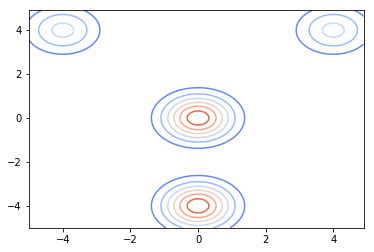

In [9]:
plt.contour(xx[0], yy[:,0], z, cmap=cm.coolwarm)

In [11]:
def four_peak_fn(x, y):
    #x = population[:,0:1]
    #y = population[:,1:]
    lhs = np.exp(-np.square(x - 4) - np.square(y - 4))
    mid = np.exp(-np.square(x + 4) - np.square(y - 4))
    rhs = 2*(np.exp(-x**2 - y**2) + np.exp(-x**2 - (y + 4)**2))
    return lhs + mid + rhs

four_peak = Func(four_peak_fn, 2, (-5, 5))